In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/loan-prediction-based-on-customer-behavior/Test Data.csv
/kaggle/input/loan-prediction-based-on-customer-behavior/Training Data.csv
/kaggle/input/loan-prediction-based-on-customer-behavior/Sample Prediction Dataset.csv


In [2]:
df_train = pd.read_csv("/kaggle/input/loan-prediction-based-on-customer-behavior/Training Data.csv")
df_test = pd.read_csv("/kaggle/input/loan-prediction-based-on-customer-behavior/Test Data.csv")
df_prediction_data = pd.read_csv("/kaggle/input/loan-prediction-based-on-customer-behavior/Sample Prediction Dataset.csv")

In [3]:
df_train.sample(10)

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
246224,246225,1847762,57,11,single,rented,no,Design_Engineer,Belgaum,Karnataka,11,14,0
174857,174858,7908473,66,0,single,rented,no,Technician,Uluberia,West_Bengal,0,10,1
122345,122346,1864741,63,15,single,rented,yes,Police_officer,Muzaffarpur,Bihar,9,12,0
107419,107420,2912105,21,14,married,rented,no,Petroleum_Engineer,Aurangabad,Maharashtra,5,12,0
106958,106959,3933433,32,5,single,rented,no,Graphic_Designer,Bhiwani,Haryana,3,12,0
38261,38262,8837967,35,14,single,rented,yes,Economist,Deoghar,Jharkhand,10,14,0
74838,74839,8898404,23,5,single,rented,no,Aviator,Chapra,Bihar,5,12,0
9396,9397,6682611,67,16,single,owned,yes,Design_Engineer,Mira-Bhayandar,Maharashtra,12,10,0
65517,65518,6410485,75,7,single,rented,yes,Artist,Tadepalligudem,Andhra_Pradesh,7,10,0
149082,149083,2566021,39,17,married,rented,no,Artist,Thane,Maharashtra,3,10,0


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


In [5]:
df_train.isnull().sum()

Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

In [6]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,252000.0,1.260005e+05,7.274628e+04,1.0,63000.75,126000.5,189000.25,252000.0
Income,252000.0,4.997117e+06,2.878311e+06,10310.0,2503015.00,5000694.5,7477502.00,9999938.0
Age,252000.0,4.995407e+01,1.706385e+01,21.0,35.00,50.0,65.00,79.0
Experience,252000.0,1.008444e+01,6.002590e+00,0.0,5.00,10.0,15.00,20.0
CURRENT_JOB_YRS,252000.0,6.333877e+00,3.647053e+00,0.0,3.00,6.0,9.00,14.0
CURRENT_HOUSE_YRS,252000.0,1.199779e+01,1.399037e+00,10.0,11.00,12.0,13.00,14.0
Risk_Flag,252000.0,1.230000e-01,3.284379e-01,0.0,0.00,0.0,0.00,1.0


In [7]:
for i in df_train.columns:
    print(i,":",df_train[i].nunique())

Id : 252000
Income : 41920
Age : 59
Experience : 21
Married/Single : 2
House_Ownership : 3
Car_Ownership : 2
Profession : 51
CITY : 317
STATE : 29
CURRENT_JOB_YRS : 15
CURRENT_HOUSE_YRS : 5
Risk_Flag : 2


In [8]:
df_train.drop('Id',axis = 1,inplace = True)

In [9]:
cat_col = ['Married/Single','House_Ownership', 'Car_Ownership', 'Profession','CITY','STATE',
       'CURRENT_JOB_YRS']

In [10]:
en = LabelEncoder()
for i in cat_col:
    df_train[i] = en.fit_transform(df_train[i])

In [11]:
df_train

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1303834,23,3,1,2,0,33,251,13,3,13,0
1,7574516,40,10,1,2,0,43,227,14,9,13,0
2,3991815,66,4,0,2,0,47,8,12,4,10,0
3,6256451,41,2,1,2,1,43,54,17,2,12,1
4,5768871,47,11,1,2,0,11,296,22,3,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...
251995,8154883,43,13,1,2,0,45,162,28,6,11,0
251996,2843572,26,10,1,2,0,3,251,13,6,11,0
251997,4522448,46,7,1,2,0,17,144,14,7,12,0
251998,6507128,45,0,1,2,0,27,233,18,0,10,0


In [12]:
x = df_train.drop('Risk_Flag',axis = 1)
y = df_train['Risk_Flag']

In [13]:
y.value_counts()

Risk_Flag
0    221004
1     30996
Name: count, dtype: int64

<Axes: ylabel='count'>

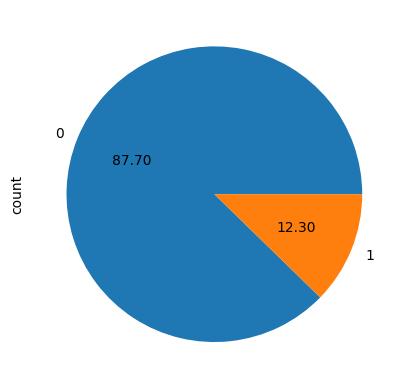

In [14]:
y.value_counts().plot.pie(autopct = '%.2f')

In [15]:
ros = RandomOverSampler()

In [16]:
x,y = ros.fit_resample(x,y)

In [17]:
y.value_counts()

Risk_Flag
0    221004
1    221004
Name: count, dtype: int64

<Axes: ylabel='count'>

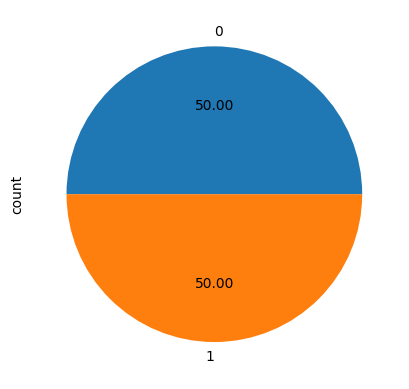

In [18]:
y.value_counts().plot.pie(autopct = '%.2f')

In [19]:
ss = StandardScaler()
x = ss.fit_transform(x)

In [20]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.3,random_state=42)

In [21]:
rfc = RandomForestClassifier(criterion='gini', bootstrap=True, max_depth=100, max_features=None, min_samples_split=2, n_estimators=100, random_state=100)

In [22]:
rfc.fit(x_train,y_train)
predict = rfc.predict(x_test)

In [23]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93    154866
           1       0.90      0.98      0.94    154540

    accuracy                           0.93    309406
   macro avg       0.94      0.93      0.93    309406
weighted avg       0.94      0.93      0.93    309406



In [24]:
df_test

,ID,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
0,1,7393090,59,19,single,rented,no,Geologist,Malda,West Bengal,4,13
1,2,1215004,25,5,single,rented,no,Firefighter,Jalna,Maharashtra,5,10
2,3,8901342,50,12,single,rented,no,Lawyer,Thane,Maharashtra,9,14
3,4,1944421,49,9,married,rented,yes,Analyst,Latur,Maharashtra,3,12
4,5,13429,25,18,single,rented,yes,Comedian,Berhampore,West Bengal,13,11
...,...,...,...,...,...,...,...,...,...,...,...,...
27995,27996,9955481,57,13,single,rented,no,Statistician,Eluru[25],Andhra Pradesh,5,10
27996,27997,2917765,47,9,single,rented,no,Technical writer,Ratlam,Madhya Pradesh,9,14
27997,27998,8082415,24,5,single,rented,no,Lawyer,Mira-Bhayandar,Maharashtra,4,13
27998,27999,9474180,51,13,single,rented,yes,Chartered Accountant,Bhilai,Chhattisgarh,13,14


In [25]:
df_test.drop("ID",axis = 1,inplace = True)

In [26]:
for i in cat_col:
    df_test[i] = en.fit_transform(df_test[i])

In [27]:
df_test

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
0,7393090,59,19,1,2,0,26,181,28,4,13
1,1215004,25,5,1,2,0,24,131,14,5,10
2,8901342,50,12,1,2,0,30,290,14,9,14
3,1944421,49,9,0,2,1,1,171,14,3,12
4,13429,25,18,1,2,1,12,39,28,13,11
...,...,...,...,...,...,...,...,...,...,...,...
27995,9955481,57,13,1,2,0,44,90,0,5,10
27996,2917765,47,9,1,2,0,47,249,13,9,14
27997,8082415,24,5,1,2,0,30,190,14,4,13
27998,9474180,51,13,1,2,1,7,47,4,13,14


In [28]:
ss = StandardScaler()
df_test = ss.fit_transform(df_test)

In [29]:
predict_test_dataset = rfc.predict(df_test)

In [30]:
print(classification_report(predict_test_dataset,df_prediction_data['risk_flag']))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84     22598
           1       0.19      0.13      0.15      5402

    accuracy                           0.73     28000
   macro avg       0.50      0.50      0.50     28000
weighted avg       0.69      0.73      0.71     28000

